In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from scipy.stats import linregress

## Data Analysis 
1. **NIO Inc. (NIO)** - NIO is a Chinese electric vehicle manufacturer known for its innovative designs and advanced battery technology. It offers a range of electric vehicles, including SUVs and sedans, and is a key player in the growing Chinese electric vehicle market.
2. **General Motors Company (GM)** - GM is an American multinational corporation that designs, manufactures, markets, and distributes vehicles and vehicle parts. It produces a wide range of vehicles, including electric vehicles, and is focusing on electric and autonomous vehicle technologies for future growth.

3. **Ford Motor Company (F)** - Ford is an American multinational automaker known for its trucks, SUVs, and electric vehicles. It has been investing heavily in electric vehicle development and plans to expand its electric vehicle lineup in the coming years.
4.  **Toyota Motor Corporation (TM)** - Toyota is a Japanese multinational automotive manufacturer known for its reliable and fuel-efficient vehicles. It has also been investing in hybrid and electric vehicle technologies to meet evolving consumer preferences and regulatory requirements.

5. **Volkswagen Group (VWAGY)** - Volkswagen is a German multinational automotive manufacturer known for its Volkswagen, Audi, Porsche, and other brands. It has ambitious plans to become a leader in electric mobility and has launched several electric vehicle models as part of its strategy.

6. **BYD Company Limited (BYDDF)** - BYD is a Chinese multinational conglomerate known for its electric vehicles, batteries, and renewable energy solutions. It is one of the largest electric vehicle manufacturers in China and has a strong presence in the global electric vehicle market.

7. **Rivian (RIVN)** - Rivian is an American electric vehicle automaker known for its electric trucks and SUVs. It has gained attention for its innovative designs and plans to target the adventure and outdoor market with its electric vehicles.

8. **XPeng Inc. (XPEV)** - XPeng is a Chinese electric vehicle manufacturer known for its smart electric vehicles equipped with advanced autonomous driving technology. It aims to provide innovative and user-friendly electric mobility solutions to consumers in China and beyond.

9. **Lucid Motors (LCID)** - Lucid Motors is an American electric vehicle manufacturer known for its luxury electric cars. It focuses on delivering high-performance electric vehicles with advanced technology and luxury features to compete in the premium electric vehicle market.

10. **Tesla, Inc. (TSLA)** - Tesla is an American electric vehicle and clean energy company known for its electric cars, solar energy products, and energy storage solutions. It is a leader in the electric vehicle market and is known for its innovative technology, including autonomous driving capabilities.


In [2]:
stocks_names = ["NIO", "GM", "F", "TM", "VWAGY", "BYDDF", "RIVN", "XPEV", "LCID", "TSLA"]
file_names = [f"Data/{ticker}.csv" for ticker in stocks_names]
columns_to_drop = ["High", "Low", "Dividends", "Volume", "Stock Splits", "Capital Gains"]
cols = [f"Return_{ticker}" for ticker in stocks_names]
cols_2 = [f"Rolling_Mean_{ticker}" for ticker in stocks_names]

In [3]:
start_date = "2021-11-11"
end_date = datetime.now().strftime("%Y-%m-%d")

for symbol in stocks_names:
    stock = yf.Ticker(symbol)
    
    historical_data = stock.history(start=start_date, end=end_date)
    
    filename = f"Data/{symbol}.csv"
    historical_data.to_csv(filename)

In [4]:
dfs = []
window_size = 2
for file_name, stock_name in zip(file_names, stocks_names):
    df = pd.read_csv(file_name).drop(columns = columns_to_drop, errors='ignore')
    df["Return"] = (df["Close"] - df["Open"])/df["Open"] * 100
    df['Rolling_Mean'] = df['Return'].rolling(window=window_size).mean()
    df.rename(columns={'Open': 'Open_' + stock_name, 'Close': 'Close_' + stock_name, 'Return': 'Return_' + stock_name, "Rolling_Mean": "Rolling_Mean_" + stock_name}, inplace=True)
    dfs.append(df)

stocks = dfs[0]
for df, stock_name in zip(dfs[1:], stocks_names[1:]):
    stocks = pd.merge(stocks, df, on="Date", how="outer", suffixes=('', '_' + stock_name))
    
tsla = dfs[-1]


In [5]:
stocks.head()

,Date,Open_NIO,Close_NIO,Return_NIO,Rolling_Mean_NIO,Open_GM,Close_GM,Return_GM,Rolling_Mean_GM,Open_F,...,Return_XPEV,Rolling_Mean_XPEV,Open_LCID,Close_LCID,Return_LCID,Rolling_Mean_LCID,Open_TSLA,Close_TSLA,Return_TSLA,Rolling_Mean_TSLA
0,2021-11-11 00:00:00-05:00,40.889999,42.200001,3.203721,NaN,58.745888,60.709976,3.343363,NaN,16.676370,...,4.113788,NaN,42.750000,44.980000,5.216373,NaN,367.589996,354.503326,-3.560127,NaN
1,2021-11-12 00:00:00-05:00,42.689999,42.669998,-0.046850,1.578435,60.484103,62.261604,2.938791,3.141077,16.455604,...,-0.959186,1.577301,44.000000,43.930000,-0.159090,2.528641,349.166656,344.473328,-1.344152,-2.452139
2,2021-11-15 00:00:00-05:00,42.599998,40.570000,-4.765256,-2.406053,62.516938,61.839329,-1.083881,0.927455,16.523532,...,-2.122396,-1.540791,44.599998,44.880001,0.627809,0.234359,339.209991,337.796661,-0.416653,-0.880402
3,2021-11-16 00:00:00-05:00,40.889999,40.669998,-0.538032,-2.651644,62.104479,61.485790,-0.996207,-1.040044,16.897138,...,3.305782,0.591693,49.930000,55.520000,11.195674,5.911741,334.436676,351.576660,5.125031,2.354189
4,2021-11-17 00:00:00-05:00,40.570000,39.669998,-2.218392,-1.378212,62.192863,63.449879,2.021157,0.512475,16.761282,...,-3.400002,-0.047110,56.200001,52.549999,-6.494665,2.350505,354.503326,363.003326,2.397721,3.761376


In [6]:
tsla.head()

,Date,Open_TSLA,Close_TSLA,Return_TSLA,Rolling_Mean_TSLA
0,2021-11-11 00:00:00-05:00,367.589996,354.503326,-3.560127,NaN
1,2021-11-12 00:00:00-05:00,349.166656,344.473328,-1.344152,-2.452139
2,2021-11-15 00:00:00-05:00,339.209991,337.796661,-0.416653,-0.880402
3,2021-11-16 00:00:00-05:00,334.436676,351.576660,5.125031,2.354189
4,2021-11-17 00:00:00-05:00,354.503326,363.003326,2.397721,3.761376


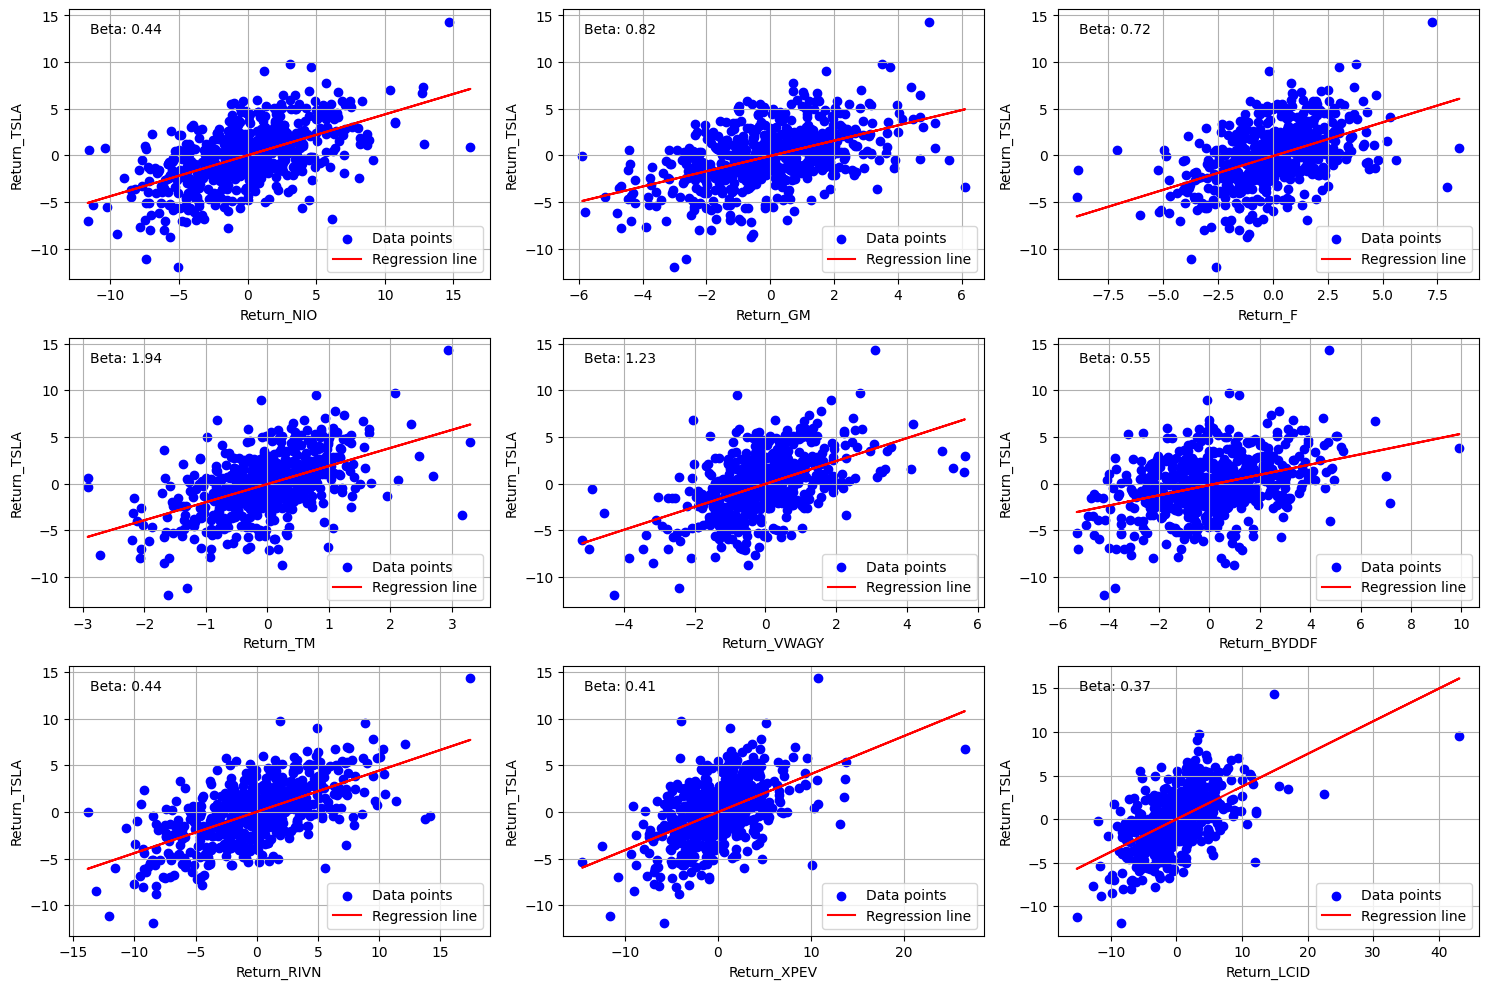

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, stock_name in enumerate(stocks_names[:-1]):
    row_index = i // 3
    col_index = i % 3
    
    slope, intercept, _, _, _ = linregress(stocks[f'Return_{stock_name}'], tsla['Return_TSLA'])
    regression_line = slope * stocks[f'Return_{stock_name}'] + intercept
    
    axs[row_index, col_index].scatter(stocks[f'Return_{stock_name}'], tsla['Return_TSLA'], color='blue', label='Data points')
    axs[row_index, col_index].plot(stocks[f'Return_{stock_name}'], regression_line, color='red', label='Regression line')
    axs[row_index, col_index].set_xlabel(f'Return_{stock_name}')
    axs[row_index, col_index].set_ylabel('Return_TSLA')
    axs[row_index, col_index].grid(True)
    axs[row_index, col_index].legend(loc='lower right')
    beta_text = f'Beta: {slope:.2f}'
    axs[row_index, col_index].text(0.05, 0.95, beta_text, ha='left', va='top', transform=axs[row_index, col_index].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
selected_df = stocks[cols].copy()
selected_df["Return_TSLA"] = tsla["Return_TSLA"].copy()

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Returns')
plt.show()

## Logistic Regression Based on Yesterday's return

In [ ]:
X_classification = stocks[cols]
y_classification = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

y_classification = y_classification[1:]
X_classification = X_classification[:-1]

len(y_classification), len(X_classification)

In [ ]:
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_classification = np.array(y_train_classification)
y_test_classification = np.array(y_test_classification)

classifier = LogisticRegression()
classifier.fit(X_train, y_train_classification)

In [ ]:
y_pred_classification = classifier.predict(X_test)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Accuracy:", classification_accuracy)

## Random Forest Based on Yesterday's return

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
random_forest_model.fit(X_train, y_train_classification)

In [ ]:
# Define the number of trees to plot
num_trees_to_plot = 5

# Plot the first 'num_trees_to_plot' decision trees in the Random Forest
for i in range(num_trees_to_plot):
    plt.figure(figsize=(20, 10))  # Set the figure size
    plot_tree(random_forest_model.estimators_[i], feature_names=cols, class_names=["Negative", "Positive"], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

In [ ]:
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [ ]:
y_pred_classification = random_forest_model.predict(X_test)


randomtree_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("RandomTree Accuracy:", randomtree_accuracy)

## Gradient Boosting Classifier Based on Yesterday's return

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train_classification)

In [ ]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [ ]:
y_pred_classification = gbm_classifier.predict(X_test)


gbm_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("GBM Accuracy:", gbm_accuracy)

## k-NN Based on Yesterday's return

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_classification)

In [ ]:
y_pred_classification = knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("k-NN Accuracy:", knn_accuracy)

In [ ]:
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary for a k-NN classifier
def plot_decision_boundary(X, y, classifier, title):
    h = 0.02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colormap for decision regions
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold colormap for data points

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality of input data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn_pca_classifier = KNeighborsClassifier(n_neighbors=10)
knn_pca_classifier.fit(X_train_pca, y_train_classification)
# Plot decision boundary using reduced-dimensional input data
plot_decision_boundary(X_train_pca, y_train_classification, knn_pca_classifier, title='k-NN Decision Boundary (PCA)')

## Neural Networks Based on Yesterday's return

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train.shape[1] is the number of features
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_classification, epochs=10, batch_size=32, validation_split=0.2)  # Assuming 10 epochs and batch size of 32

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

## Logistic Regression Based on n days rolling window

In [ ]:
X_classification_2 = stocks[cols_2]
y_classification_2 = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

X_classification_2 = X_classification_2[1:-1]
y_classification_2 = y_classification_2[2:]

len(y_classification_2), len(X_classification_2)

In [ ]:
X_train_2, X_test_2, y_train_classification_2, y_test_classification_2 = train_test_split(X_classification_2, y_classification_2, test_size=0.2, random_state=42)

X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_classification_2 = np.array(y_train_classification_2)
y_test_classification_2 = np.array(y_test_classification_2)

classifier = LogisticRegression()
classifier.fit(X_train_2, y_train_classification_2)

In [ ]:
y_pred_classification_2 = classifier.predict(X_test_2)
classification_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("Classification Accuracy:", classification_accuracy)

## Random Forest Model Based on n days rolling window

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(X_train_2, y_train_classification_2)


plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=cols_2, class_names=['Negative', 'Positive'], filled=True)
plt.title('Random Forest Decision Tree')
plt.show()

In [ ]:
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [ ]:
y_pred_classification_2 = rf_classifier.predict(X_test_2)


randomtree_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("RandomTree Accuracy:", randomtree_accuracy)

## Gradient Boosting Classifier Based on n days rolling window

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_2, y_train_classification_2)

In [ ]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [ ]:
y_pred_classification_2 = gbm_classifier.predict(X_test_2)


gbm_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("GBM Accuracy:", gbm_accuracy)

## k-NN Based on n days rolling window

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_2, y_train_classification_2)

In [ ]:
y_pred_classification_2 = knn_classifier.predict(X_test_2)


knn_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("k-NN Accuracy:", knn_accuracy)

## Neural Networks Based on n days rolling window

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_2,y_train_classification_2, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_2, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)